<a href="https://colab.research.google.com/github/FredLongo/MLDL/blob/main/CNN_P2_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data_rep_path       = "D:/Databases/Dataset_Project_1_1/Dataset_Project_1/train/"
folder_path       = "D:\\Databases\\Dataset_Project_1_1\\Dataset_Project_1\\train_4000"
test_predict_folder_name = "D:\\Databases\\Dataset_Project_1_1\\Dataset_Project_1\\test_prediction"  # New prediction directory

picture_size = 224
no_of_classes = 3
batch_size = 50
epochs = 20


In [ ]:
# Original data set was too large so we shrunk it to 4,000 per Class
'''
#  Only When Needed
from Catagory_Data_Handler import Catagory_Data_Handle
file_copyer = Catagory_Data_Handle(data_rep_path,test_predict_folder_name,50 )
file_copyer.copy_files()
'''

'\n#  Only When Needed\nfrom Catagory_Data_Handler import Catagory_Data_Handle\nfile_copyer = Catagory_Data_Handle(data_rep_path,test_predict_folder_name,50 )\nfile_copyer.copy_files()\n'

In [ ]:

# Create a dataset for training and validation by splitting
# data to 80% training and 20% validation
# files are randomly selected


train_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(picture_size, picture_size),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear"
)

# Create a dataset for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(picture_size, picture_size),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear"
)


Found 12000 files belonging to 3 classes.
Using 9600 files for training.
Found 12000 files belonging to 3 classes.
Using 2400 files for validation.


In [ ]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:

model = Sequential()

#1st CNN layer
#model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(Input(shape=(picture_size, picture_size, 1))),  # Explicit Input layer))
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))


In [ ]:

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,            loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 28,987,139 (110.58 MB)

 Trainable params: 28,983,171 (110.56 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
print("Start Time:",(datetime.now()).strftime("%H:%M:%S"))

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                  ModelCheckpoint("model.keras", monitor='val_accuracy', save_best_only=True),
                  ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_delta=0.0001)]

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=callbacks_list
)


print("End Time:",(datetime.now()).strftime("%H:%M:%S"))


Start Time: 02:10:15
Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5284s 27s/step - accuracy: 0.4879 - loss: 1.1570 - val_accuracy: 0.3483 - val_loss: 1.5223 - learning_rate: 1.0000e-04
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5016s 26s/step - accuracy: 0.7974 - loss: 0.4962 - val_accuracy: 0.6408 - val_loss: 0.7821 - learning_rate: 1.0000e-04
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5047s 26s/step - accuracy: 0.9054 - loss: 0.2579 - val_accuracy: 0.7658 - val_loss: 0.5953 - learning_rate: 1.0000e-04
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5175s 27s/step - accuracy: 0.9476 - loss: 0.1651 - val_accuracy: 0.7604 - val_loss: 0.5885 - learning_rate: 1.0000e-04
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 4821s 25s/step - accuracy: 0.9695 - loss: 0.0998 - val_accuracy: 0.7525 - val_loss: 0.6658 - learning_rate: 1.0000e-04
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2063s 11s/step - accuracy: 0.9795 - loss: 0.0725 - val_accuracy: 0.8746 - val_loss: 0.3309 - learning_rate: 1.0000e-04
Epoch 7/20
192/192 ━━━━━━

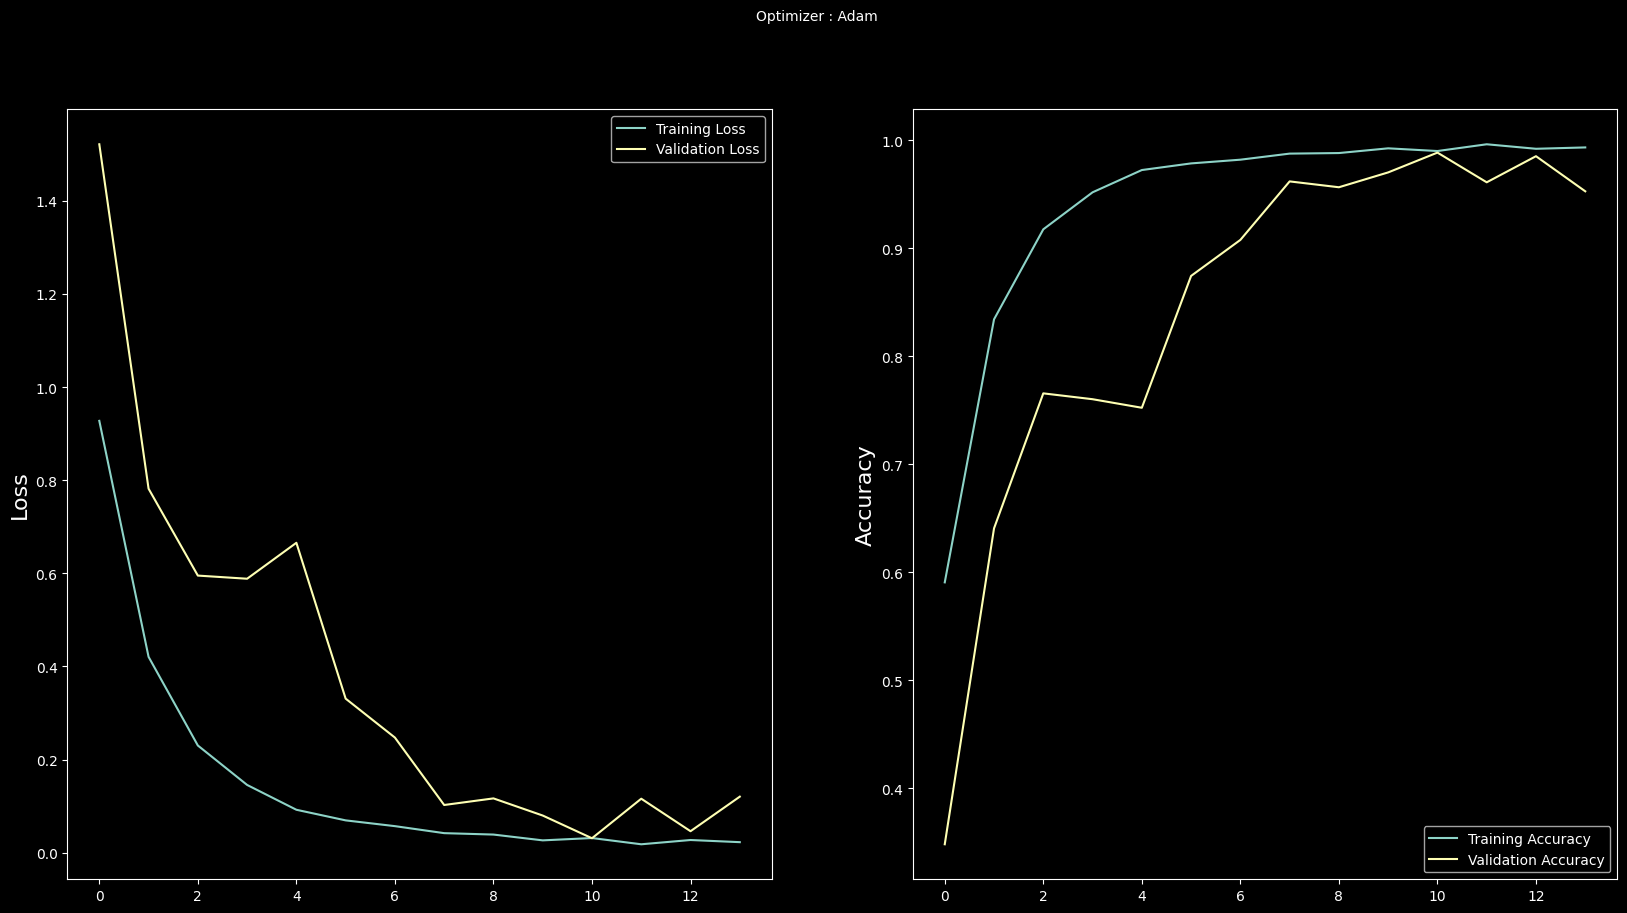

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Test Prediction data generator
test_predict_generator = tf.keras.utils.image_dataset_from_directory(
    test_predict_folder_name,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    image_size=(picture_size, picture_size),
    shuffle=False,
    seed=123,
    interpolation="bilinear")

Found 300 files belonging to 3 classes.


In [ ]:
# Predict the class of the new data
predictions = model.predict(test_predict_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes =  np.array([])
for x , y in test_predict_generator:
    true_classes = np.concatenate([true_classes, np.argmax(y.numpy(), axis=-1)])

# Classification report
class_labels = {label: index for index, label in enumerate(test_predict_generator.class_names)}
report = classification_report(true_classes, predicted_classes, target_names=class_labels)



10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [ ]:
print(report)

                          precision    recall  f1-score   support

           Class 1 Touch       0.99      0.96      0.97       100
        Class 2 No hands       0.99      0.98      0.98       100
Class 3 No Touch w Hands       0.96      1.00      0.98       100

                accuracy                           0.98       300
               macro avg       0.98      0.98      0.98       300
            weighted avg       0.98      0.98      0.98       300



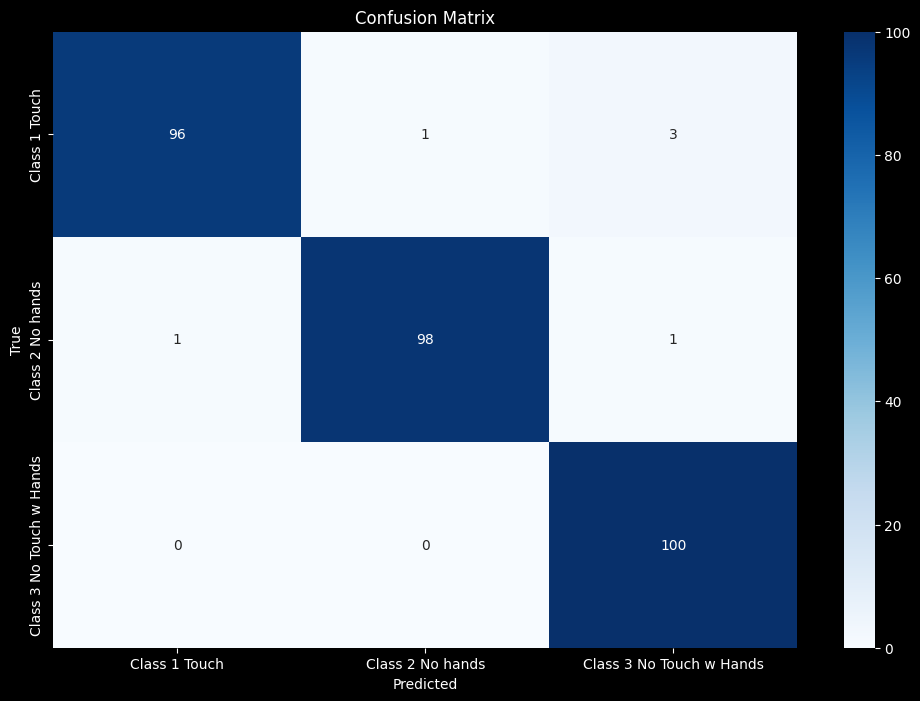

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()